In [1]:
#import necessary libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
#!pip install xgboost

### EDA and Data Preprocessing

In [3]:
#reading the dataset as a pandas dataframe
df = pd.read_csv("survey_results_public.csv")

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df.shape

(64461, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [7]:
df.isnull().sum()/df.shape[0] * 100

Respondent             0.000000
MainBranch             0.463846
Hobbyist               0.069810
Age                   29.498456
Age1stCode            10.178247
                        ...    
WebframeWorkedWith    34.411505
WelcomeChange         18.271513
WorkWeekHrs           36.161400
YearsCode             10.513334
YearsCodePro          28.097609
Length: 61, dtype: float64

In [8]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [9]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [10]:
required_columns = ["Employment", "Country", "EdLevel", "YearsCodePro", "ConvertedComp"]

In [11]:
df = df[required_columns]

In [12]:
df.head()

,Employment,Country,EdLevel,YearsCodePro,ConvertedComp
0,"Independent contractor, freelancer, or self-em...",Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,NaN
1,Employed full-time,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,NaN
2,NaN,Russian Federation,NaN,NaN,NaN
3,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN
4,Employed full-time,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,NaN


In [13]:
df = df.rename({"ConvertedComp": "Salary"}, axis=1)

In [14]:
df = df[df['Salary'].notnull()]
df.head()

,Employment,Country,EdLevel,YearsCodePro,Salary
7,Employed full-time,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,Employed full-time,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,Employed full-time,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Employed full-time,Spain,Some college/university study without earning ...,7,14268.0
12,Employed full-time,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0


In [15]:
df.shape

(34756, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employment    34717 non-null  object 
 1   Country       34756 non-null  object 
 2   EdLevel       34188 non-null  object 
 3   YearsCodePro  34621 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [17]:
df.isnull().sum()/df.shape[0]*100

Employment      0.112211
Country         0.000000
EdLevel         1.634250
YearsCodePro    0.388422
Salary          0.000000
dtype: float64

In [18]:
#since the number of rows with missing values is few we drop them
df = df.dropna()
df.isnull().sum()

Employment      0
Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [19]:
df['Employment'].value_counts()

Employed full-time                                      30019
Independent contractor, freelancer, or self-employed     2998
Employed part-time                                       1008
Name: Employment, dtype: int64

In [20]:
#we are interested in capturing only employees who were employed full time
df = df[df['Employment'] == 'Employed full-time']

#we drop the Employment column because it now has only 1 unique value, thus not required for prediction
df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [21]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [22]:
#removing countries that have few datapoints, since it is not enough data for a model to learn patterns from
#using the following function to create the others category for every country that has samples less than the cutoff 

def required_categories(categories, cutoff):
    categorical_map = {}
    for i in range (len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Others'
    return categorical_map

In [23]:
country_map = required_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Others                8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

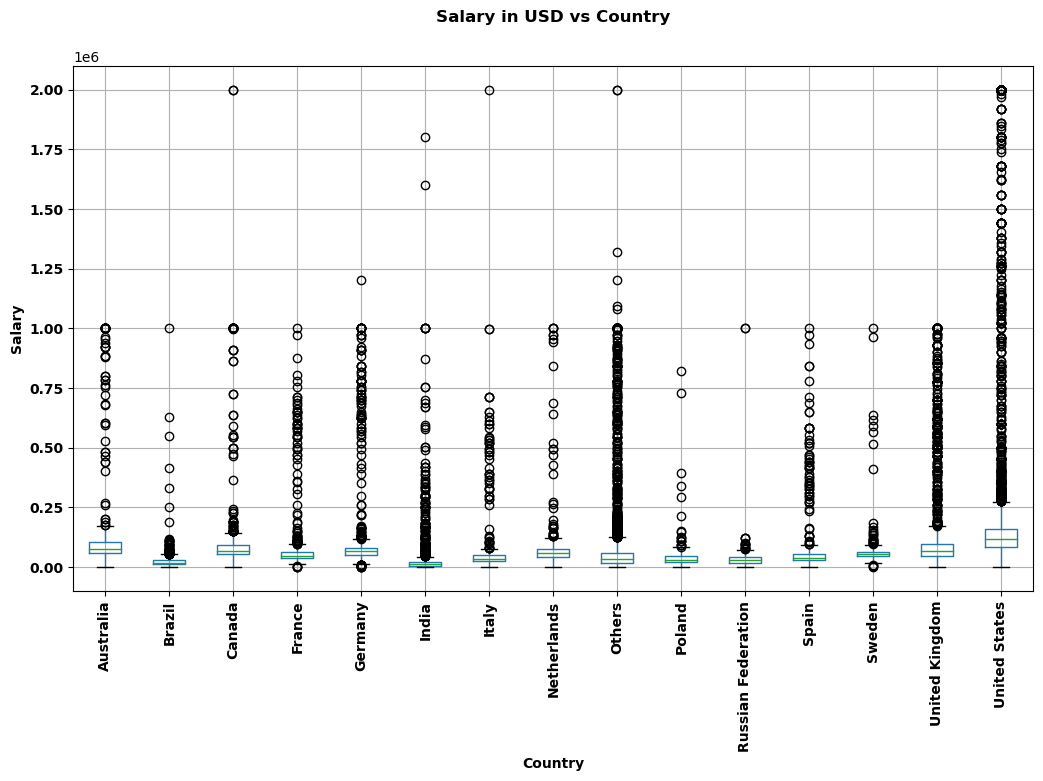

In [24]:
#visualizing the salary distribution using a box plot, plotting countries on x axis and salary on y axis

fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in USD vs Country', fontweight='bold')
plt.title('')
plt.ylabel('Salary', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.xticks(rotation=90, fontweight='bold')
plt.yticks(fontweight='bold')
plt.show

In [25]:
#the area represented by the boxes in the box plot above represent the median salary for every country and all the points above represent outliers
#there are a lot of outliers in this data and since most of the datapoints are in the median area, and none of the boxes reaches over 250K salary line
#we will take the data upto this line to preserve most of the information

df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Others']

<function matplotlib.pyplot.show(close=None, block=None)>

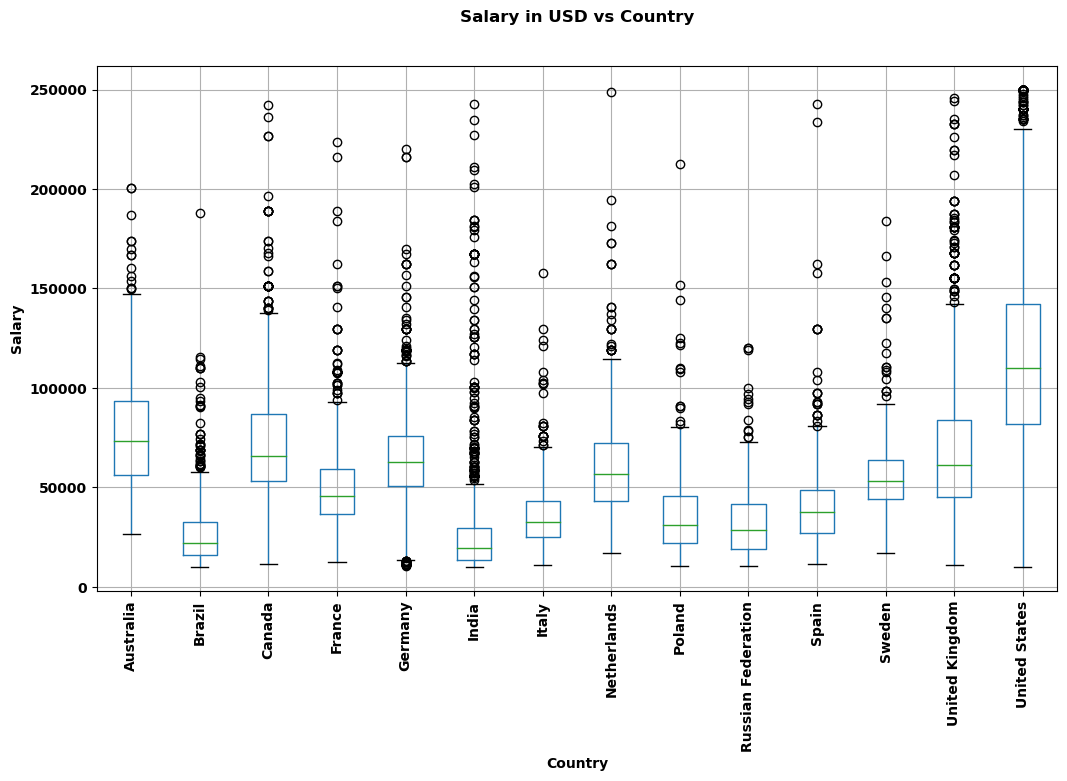

In [26]:
#plotting the same box plot after the changes

fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in USD vs Country', fontweight='bold')
plt.title('')
plt.ylabel('Salary', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.xticks(rotation=90, fontweight='bold')
plt.yticks(fontweight='bold')
plt.show

In [27]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [28]:
#following function cleans and formats the YearsCodePro column since it has numbers as strings 
#and a couple of values in text

def clean_yearsofexperience(exp):
    if exp == 'More than 50 years':
        return 50
    if exp == 'Less than 1 year':
        return 0.5
    return float(exp)


In [29]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_yearsofexperience)

In [30]:
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [31]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [32]:
#the following function cleans and reformats the EdLevel column

def clean_Edlevel(ed):
    
    if "Bachelor’s degree (B.A., B.S., B.Eng., etc.)" in ed:
        return "Bachelor's degree"
    if "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" in ed:
        return "Master's degree"
    if "Professional degree" in ed or "Other doctoral" in ed:
        return "Post grad"
    return "Less than a Bachelor degree"
        

In [33]:
df['EdLevel'] = df['EdLevel'].apply(clean_Edlevel)

In [34]:
df['EdLevel'].unique()

array(["Bachelor's degree", "Master's degree",
       'Less than a Bachelor degree', 'Post grad'], dtype=object)

In [35]:
#transform string values to numbers using label encoder

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3])

In [36]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [37]:
#separating the feature columns and the target column

X = df.drop("Salary", axis=1)
y = df['Salary']

In [38]:
#splitting the dataset into train and test sets, models will be trained on train data and 
#evaluated on unseen test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

### Modeling

In [39]:
#Linear Regressor
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE_LinearRegressor:", mean_absolute_error(y_test, y_pred))
print("RMSE_LinearRegressor:", error)
print("R2 score_LinearRegressor:", r2_score(y_test, y_pred))

MAE_LinearRegressor: 30008.598354774433
RMSE_LinearRegressor: 38685.41113157726
R2 score_LinearRegressor: 0.3506567642385181


In [40]:
#Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE_DecisionTreeRegressor:", mean_absolute_error(y_test, y_pred))
print("RMSE_DecisionTree:", error)
print("R2 score_DecisionTree:", r2_score(y_test, y_pred))

MAE_DecisionTreeRegressor: 22035.419815892972
RMSE_DecisionTree: 31558.874399593697
R2 score_DecisionTree: 0.5678615624566818


In [41]:
#Random Forest Regressor
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE_RandomForestRegressor:", mean_absolute_error(y_test, y_pred))
print("RMSE_RandomForestRegressor:", error)
print("R2 score_RandomForest:", r2_score(y_test, y_pred))

MAE_RandomForestRegressor: 21805.768314295376
RMSE_RandomForestRegressor: 31122.100553444267
R2 score_RandomForest: 0.5797403538449966


In [42]:
#Extreme Gradient Boosting Regressor
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE_XGB:", mean_absolute_error(y_test, y_pred))
print("RMSE_XGB:", error)
print("R2 score_XGB:", r2_score(y_test, y_pred))

MAE_XGB: 21536.509844299137
RMSE_XGB: 30885.287973573457
R2 score_XGB: 0.586111654474083


In [43]:
#KNeighbors regressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE_KNeighbors:", mean_absolute_error(y_test, y_pred))
print("RMSE_KNeighbors:", error)
print("R2 score_KNeighbors:", r2_score(y_test, y_pred))

MAE_KNeighbors: 23482.491105704245
RMSE_KNeighbors: 33101.19242418733
R2 score_KNeighbors: 0.5245912560453193


In [44]:
#hyperparameter tuning
max_depth = [2, 4, 6, 8, 10, 12, None]
params = {"max_depth" : max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, params, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, None]},
             scoring='neg_mean_squared_error')

In [45]:
#using the best parameter combination
regressor = gs.best_estimator_
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

30885.01107801317


### Applying our trained model to new data, same as we will do on the app later

In [53]:
#our main data and the features
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


In [54]:
#country, edlevel. yearscodepro for new unseen data
X_new = np.array([["United States", "Master's degree", 15]])
X_new

array([['United States', "Master's degree", '15']], dtype='<U21')

In [55]:
#applying label encoder for text inputs

X_new[:, 0] = le_country.transform(X_new[:, 0])
X_new[:, 1] = le_education.transform(X_new[:, 1])
X_new = X_new.astype(float)
X_new

array([[13.,  2., 15.]])

In [56]:
y_pred = regressor.predict(X_new)
y_pred

/home/poulomi/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139097.12903226])

In [57]:
#saving the model and the label encoders as a pickle file
import pickle
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [58]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [60]:
y_pred = regressor_loaded.predict(X_new)
y_pred

/home/poulomi/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139097.12903226])